## Data Preprocessing

In [35]:
import pandas as pd

In [36]:
# Run the data preprocessing notebook
data = pd.read_csv('docs/anxiety_attack_dataset.csv')

In [37]:
# There are not duplicated rows in the dataset
data.duplicated().value_counts()

False    12000
Name: count, dtype: int64

In [38]:
# There are not Na's in the data
for column in data:
    print(data[column].isna().value_counts())
    print(" ")


ID
False    12000
Name: count, dtype: int64
 
Age
False    12000
Name: count, dtype: int64
 
Gender
False    12000
Name: count, dtype: int64
 
Occupation
False    12000
Name: count, dtype: int64
 
Sleep Hours
False    12000
Name: count, dtype: int64
 
Physical Activity (hrs/week)
False    12000
Name: count, dtype: int64
 
Caffeine Intake (mg/day)
False    12000
Name: count, dtype: int64
 
Alcohol Consumption (drinks/week)
False    12000
Name: count, dtype: int64
 
Smoking
False    12000
Name: count, dtype: int64
 
Family History of Anxiety
False    12000
Name: count, dtype: int64
 
Stress Level (1-10)
False    12000
Name: count, dtype: int64
 
Heart Rate (bpm during attack)
False    12000
Name: count, dtype: int64
 
Breathing Rate (breaths/min)
False    12000
Name: count, dtype: int64
 
Sweating Level (1-5)
False    12000
Name: count, dtype: int64
 
Dizziness
False    12000
Name: count, dtype: int64
 
Medication
False    12000
Name: count, dtype: int64
 
Therapy Sessions (per month)
Fa

#### Diego's preprocessing

In [39]:
# Dizinness (Yes/No)
print("We replace the values of the Dizziness feature with 1 for Yes and 0 for No")
data['Dizziness'] = data['Dizziness'].replace('Yes', 1)
data['Dizziness'] = data['Dizziness'].replace('No', 0)

# Obviously, there are no outliers for this feature, nor there is need for normalization

# Check for class imbalance
print(" ")
print("Class imbalance for the Dizziness feature")
print(data['Dizziness'].value_counts(normalize=True))
print("We can see that the classes are more or less balanced")

We replace the values of the Dizziness feature with 1 for Yes and 0 for No
 
Class imbalance for the Dizziness feature
Dizziness
0    0.7005
1    0.2995
Name: proportion, dtype: float64
We can see that the classes are more or less balanced


/tmp/ipykernel_8501/226695829.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Dizziness'] = data['Dizziness'].replace('No', 0)


In [40]:
# Medication (Yes(No)
print("We replace the values of the Medication feature with 1 for Yes and 0 for No")
data['Medication'] = data['Medication'].replace('Yes', 1)
data['Medication'] = data['Medication'].replace('No', 0)

# Obviously, there are no outliers for this feature, nor there is need for normalization

# Check for class imbalance
print(" ")
print("Class imbalance for the Medication feature")
print(data['Medication'].value_counts(normalize=True))
print("We can see that the classes are more or less balanced")

We replace the values of the Medication feature with 1 for Yes and 0 for No
 
Class imbalance for the Medication feature
Medication
0    0.800417
1    0.199583
Name: proportion, dtype: float64
We can see that the classes are more or less balanced


/tmp/ipykernel_8501/1091502321.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Medication'] = data['Medication'].replace('No', 0)


The distribution of the Therapy Sessions (per month) feature
count    12000.000000
mean         4.518417
std          2.866010
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Therapy Sessions (per month), dtype: float64
 
We check for outliers in the Therapy Sessions (per month) feature


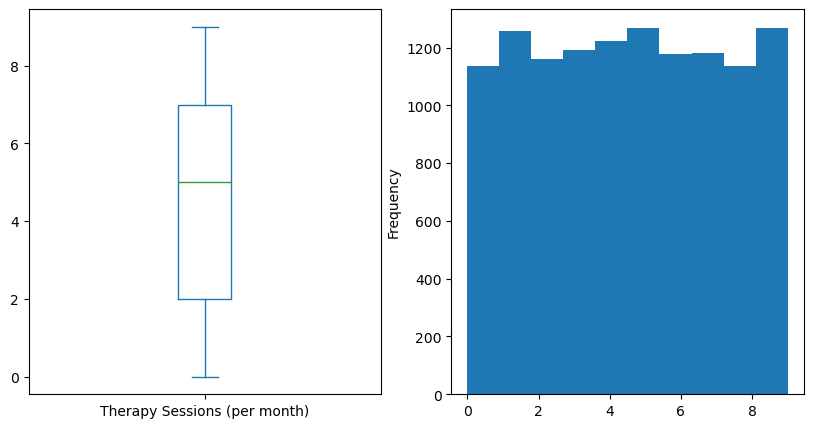

2.0
7.0


In [41]:
# Therapy Sessions (per month) (numerical variable)
# We check the distribution of the variable
print("The distribution of the Therapy Sessions (per month) feature")
print(data['Therapy Sessions (per month)'].describe())

# Check outliers
print(" ")
print("We check for outliers in the Therapy Sessions (per month) feature")

# boxplot and histogram 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['Therapy Sessions (per month)'].plot(kind='box')
plt.subplot(1, 2, 2)
data['Therapy Sessions (per month)'].plot(kind='hist')
plt.show()

print(data['Therapy Sessions (per month)'].quantile(0.25))
print(data['Therapy Sessions (per month)'].quantile(0.75))

# There are no outliers in the Therapy Sessions (per month) feature

# Normalize the variable
data['Therapy Sessions (per month)'] = (data['Therapy Sessions (per month)'] - data['Therapy Sessions (per month)'].mean()) / data['Therapy Sessions (per month)'].std()

In [42]:
# Recent Major Life Event (Yes/No)
print("We replace the values of the Recent Major Life Event feature with 1 for Yes and 0 for No")
data['Recent Major Life Event'] = data['Recent Major Life Event'].replace('Yes', 1)
data['Recent Major Life Event'] = data['Recent Major Life Event'].replace('No', 0)

# Obviously, there are no outliers for this feature, nor there is need for normalization

# Check for class imbalance
print(" ")
print("Class imbalance for the Recent Major Life Event feature")
print(data['Recent Major Life Event'].value_counts(normalize=True))
print("We can see that the classes are more or less balanced")

We replace the values of the Recent Major Life Event feature with 1 for Yes and 0 for No
 
Class imbalance for the Recent Major Life Event feature
Recent Major Life Event
0    0.7545
1    0.2455
Name: proportion, dtype: float64
We can see that the classes are more or less balanced


/tmp/ipykernel_8501/2421506985.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Recent Major Life Event'] = data['Recent Major Life Event'].replace('No', 0)


In [ ]:
# Diet quality (1-10) (Numerical variable)
# We check the distribution of the variable
print("The distribution of the Diet quality (1-10) feature")
print(data['Diet Quality (1-10)'].describe())

# There are no outliers in the Diet Quality (1-10) feature since all values go from 1 to 10

# Check class imbalance
print(" ")
print("We check for class imbalance in the Diet Quality (1-10) feature")
print(data['Diet Quality (1-10)'].value_counts(normalize=True))
print("We can see that the classes are completely balanced")

# Normalize the variable
data['Diet Quality (1-10)'] = (data['Diet Quality (1-10)'] - data['Diet Quality (1-10)'].mean()) / data['Diet Quality (1-10)'].std()

The distribution of the Diet quality (1-10) feature
count    12000.000000
mean         5.497333
std          2.867579
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Diet Quality (1-10), dtype: float64
 
We check for class imbalance in the Diet Quality (1-10) feature
Diet Quality (1-10)
2     0.103667
5     0.102417
3     0.102083
6     0.101500
10    0.101250
8     0.099000
9     0.098417
7     0.098167
4     0.097250
1     0.096250
Name: proportion, dtype: float64
We can see that the classes are completely balanced
